In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text="ABCDE",org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

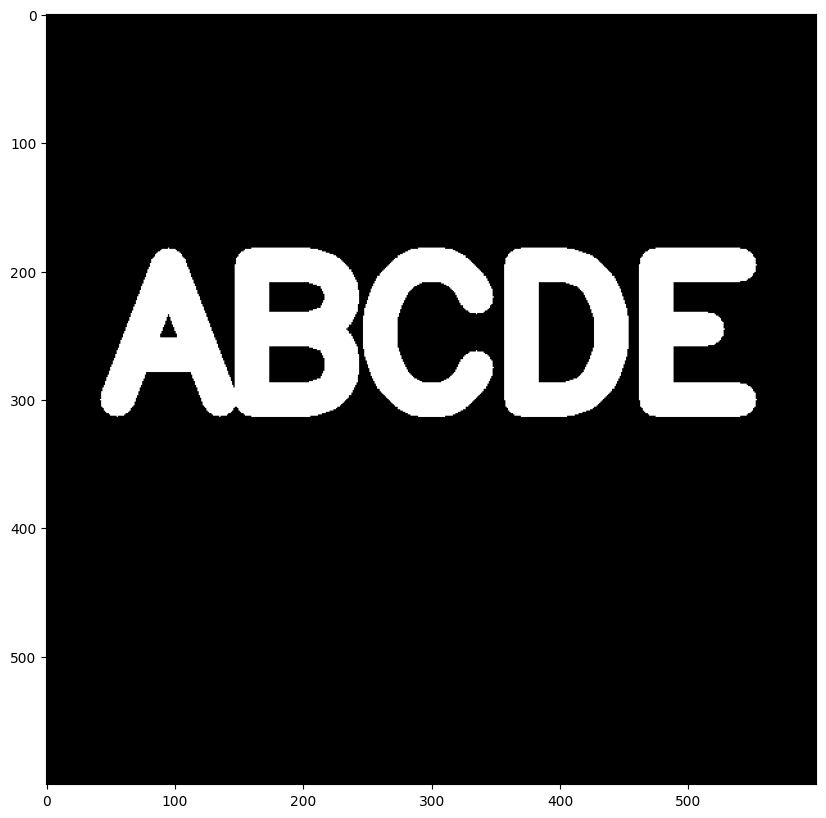

In [21]:
img = load_img()
display_img(img)

In [10]:
#erode method
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

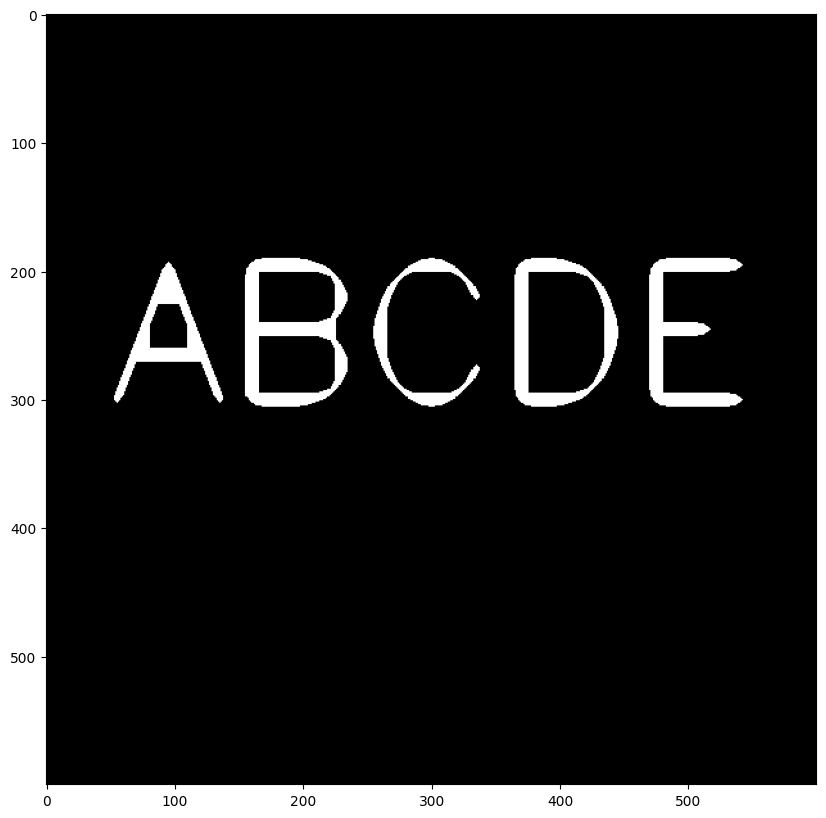

In [22]:
result = cv2.erode(img,kernel=kernel,iterations=4)
#cv2.erode()函数实现了图像腐蚀操作，它用于消除图像中的白色噪声，或者将对象的边界腐蚀掉。
display_img(result)

In [32]:
img = load_img()

In [33]:
#add some noise
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0]])

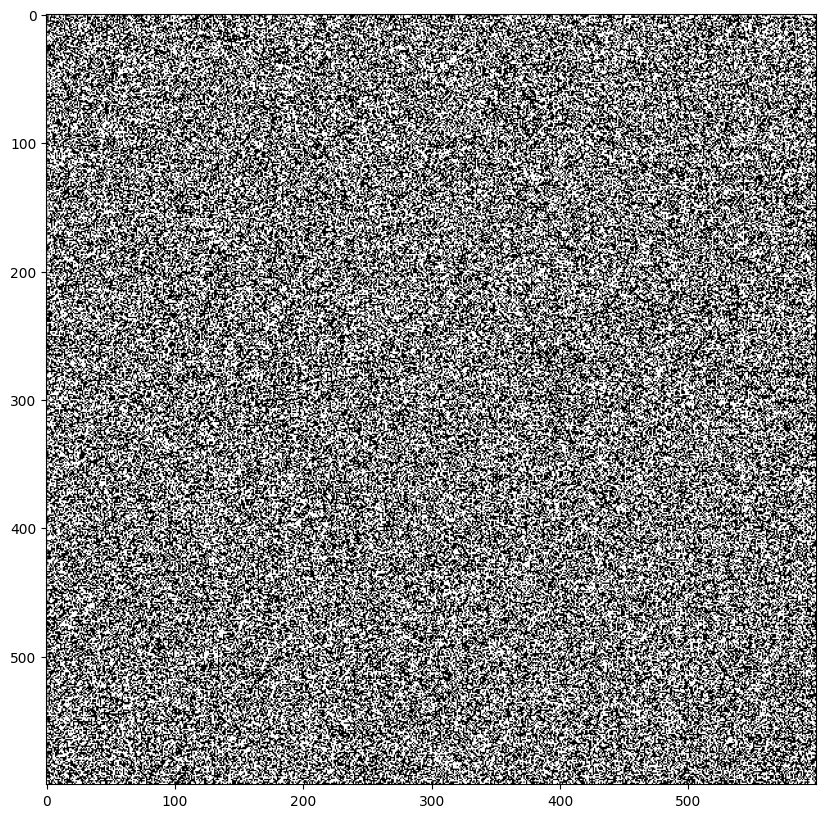

In [34]:
display_img(white_noise)

In [35]:
print(img.max())

255.0


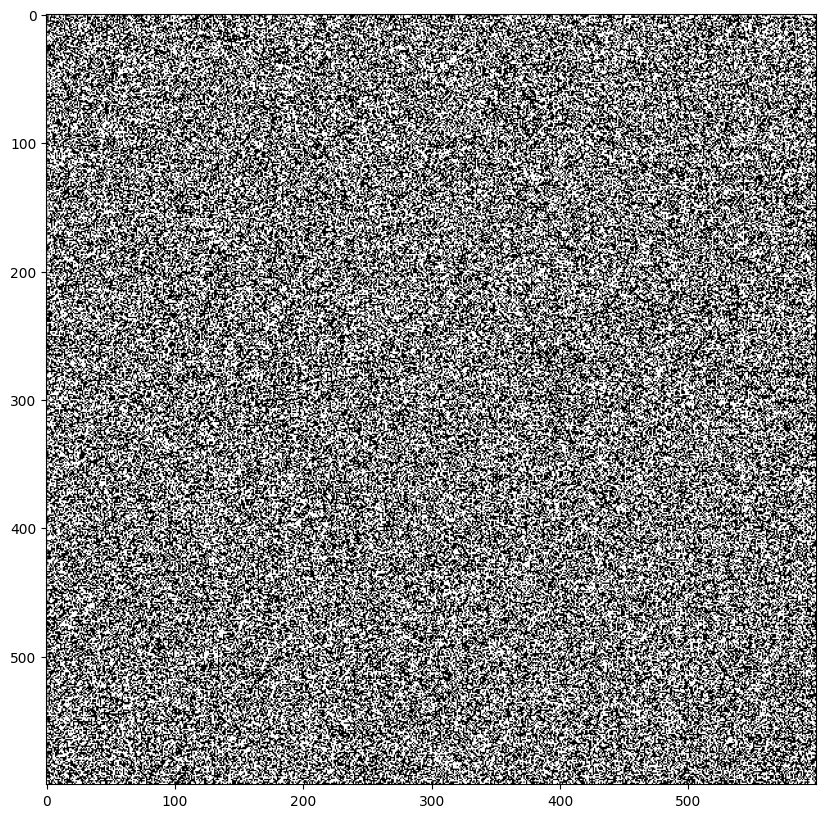

In [36]:
white_noise = white_noise * 255
display_img(white_noise)

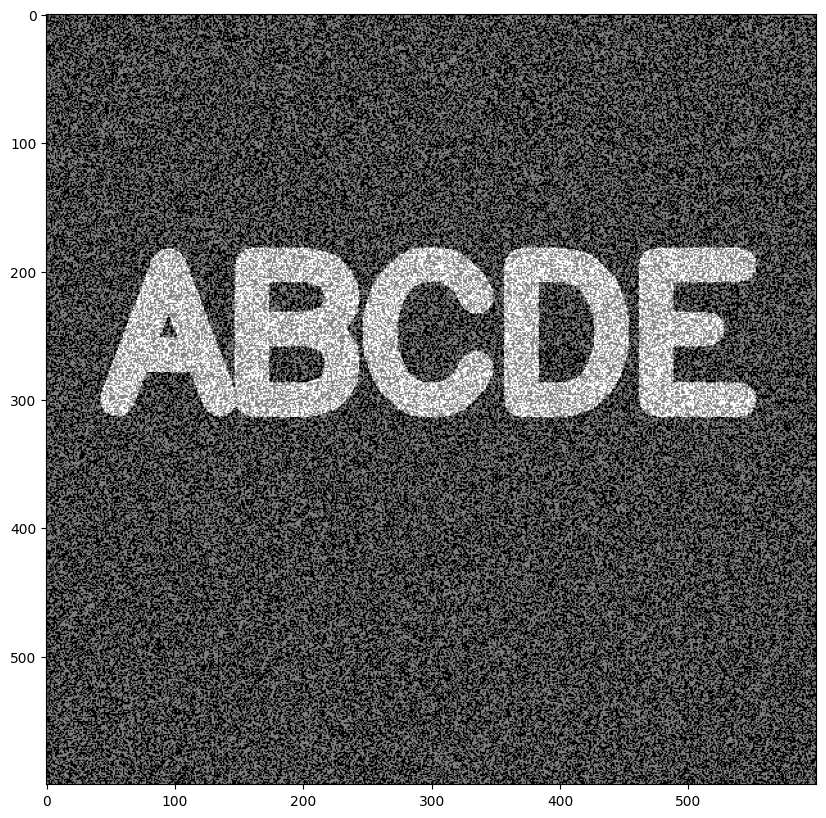

In [37]:
noise_img = white_noise + img
display_img(noise_img)

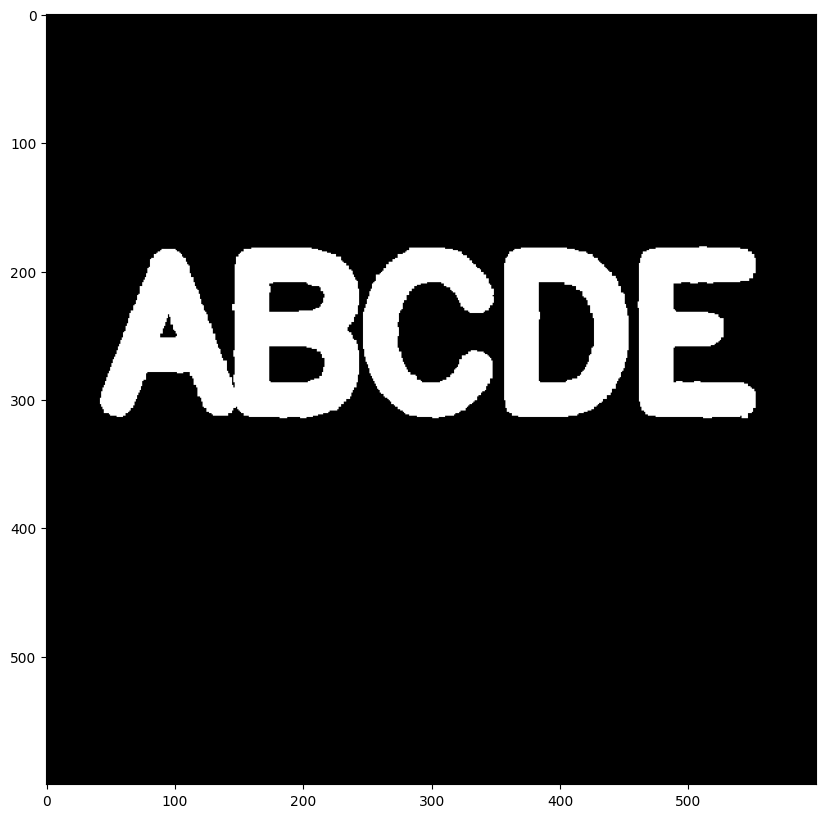

In [38]:
#use opening method to remove noise
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel=kernel)
#开运算（Opening）是先进行腐蚀（Erosion）后再进行膨胀（Dilation）。这主要用于消除小的物体，在去噪声的同时，不改变原始图像的大小或者形状。
display_img(opening)

In [ ]:
#above is an example about remvoe background noise
#below is an example about frontground noise

In [40]:
#realod img
img = load_img()

In [41]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise = black_noise * -255
black_noise

array([[   0,    0,    0, ..., -255, -255, -255],
       [   0,    0,    0, ..., -255,    0, -255],
       [   0,    0,    0, ..., -255,    0, -255],
       ...,
       [-255,    0, -255, ...,    0, -255, -255],
       [   0, -255,    0, ..., -255, -255, -255],
       [-255, -255, -255, ..., -255, -255, -255]])

In [44]:
black_noise_img = black_noise + img
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
black_noise_img[black_noise_img == -255] = 0
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
print(black_noise_img.min())

0.0


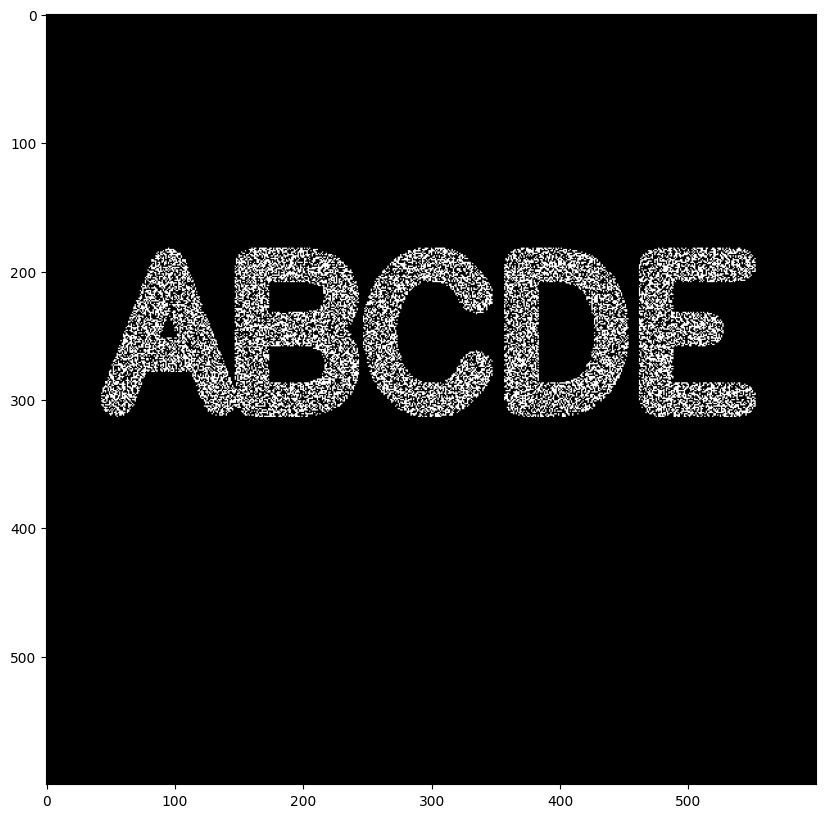

In [47]:
display_img(black_noise_img)

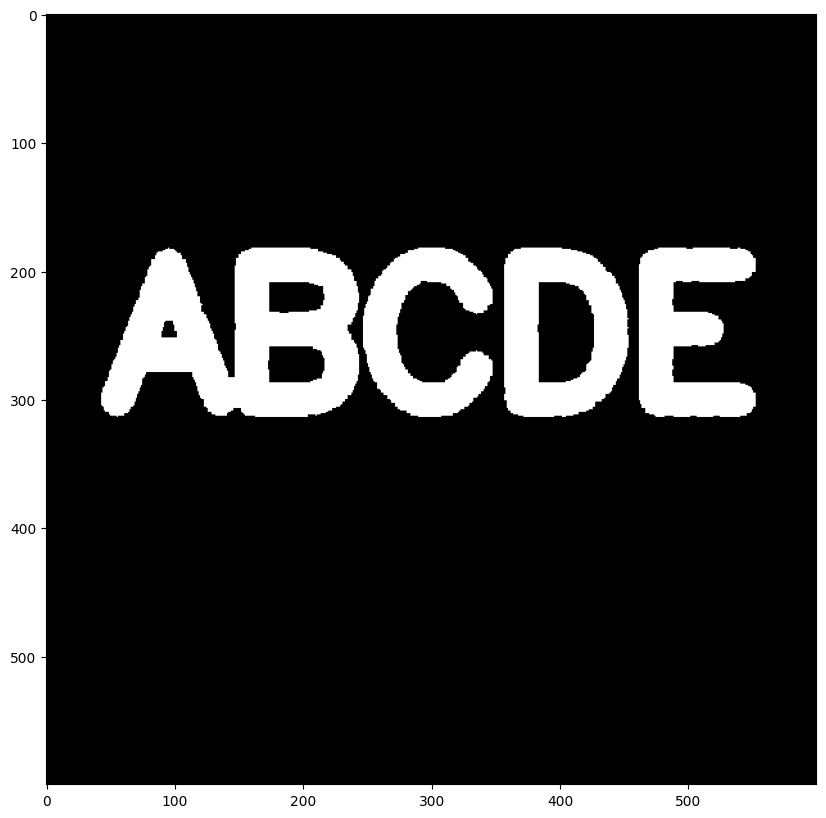

In [48]:
closing = cv2.morphologyEx(src=black_noise_img,op=cv2.MORPH_CLOSE,kernel=kernel)
#MORPH_CLOSE：闭运算（Closing）是先进行膨胀（Dilation）后再进行腐蚀（Erosion）。这主要用于关闭前景物体中的小洞，或者小黑点。
display_img(closing)

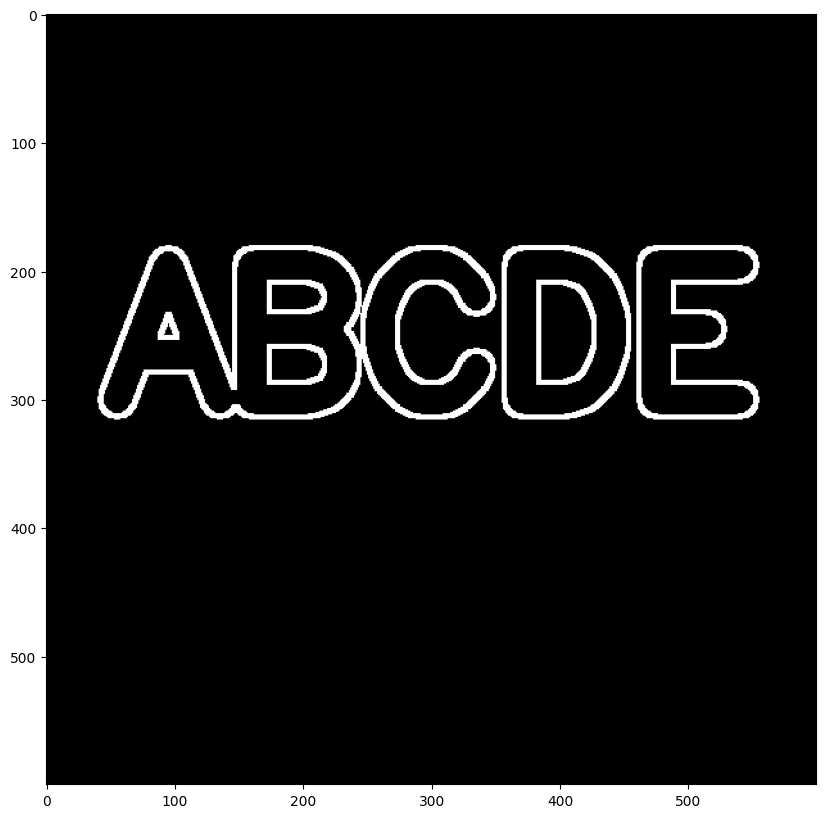

In [49]:
#gradient method,它会取腐蚀和膨胀的差值，基本上就是外框
gradient = cv2.morphologyEx(src=img,op=cv2.MORPH_GRADIENT,kernel=kernel)
display_img(gradient)